In [35]:
# Step-1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import statsmodels.api as sm

In [9]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
print(X)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
print(true_salaries)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[30 35 40 45 50 55 60 65 70 75]


In [8]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
print(noise)
Y = true_salaries + noise  # Final dependent variable with noise
print(Y)

[ 2.48357077 -0.69132151  3.23844269  7.61514928 -1.17076687 -1.17068478
  7.89606408  3.83717365 -2.34737193  2.71280022]
[32.48357077 34.30867849 43.23844269 52.61514928 48.82923313 53.82931522
 67.89606408 68.83717365 67.65262807 77.71280022]


In [11]:
# Step-3: Creates a Linear Regression model
model=LinearRegression() #Initialize the model

In [12]:
# Step-4: Train the model using the dataset
model.fit(X,Y) # The model learns the best fit line by minimizing the error

LinearRegression()

In [14]:
# Step-5: Get the values of slope(m) and intercept(c) from the trained model 
m=model.coef_[0] # Coefficient (slope) of the regression line
c=model.intercept_ # Intercept (where line crosses the Y-axis)

In [15]:
print(m)

4.965498141580591


In [16]:
print(c)

27.430065779800536


In [19]:
# Step-6: Display the equation of the line
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")

Equation of the line: Y = 4.97X + 27.43


In [20]:
# Step-7: Predict values using model
Y_pred=model.predict(X) # Predict salaries for the given experience values

In [30]:
# Mean Squared Error
mse=mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error(MSE): {mse:.2f}")

Mean Squared Error(MSE): 11.75


In [31]:
# Mean Absolute Error
mae=mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error(MSE): {mae:.2f}")

Mean Absolute Error(MSE): 2.87


In [36]:
# Root Mean Squared Error
from math import sqrt
rmse=sqrt(mse)
print(f"Root Mean Squared Error(RMSE): {rmse:.2f}")

Root Mean Squared Error(RMSE): 3.43


In [38]:
# R-Squared - Represents how wll the model fits the data (0 to 1, where 1 is best) 
r2=r2_score(Y, Y_pred)
print(f"R-Squared: {r2:.2f}")

R-Squared: 0.95


In [39]:
# Adjusted R-Squared - Adjusted for the no. of prdictors, betteer fot multiple regression
n=len(Y) # No. of observations
p=1 # no. of independent variable (Expirience)
adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R-Squared: {adj_r2:.2f}")

Adjusted R-Squared: 0.94


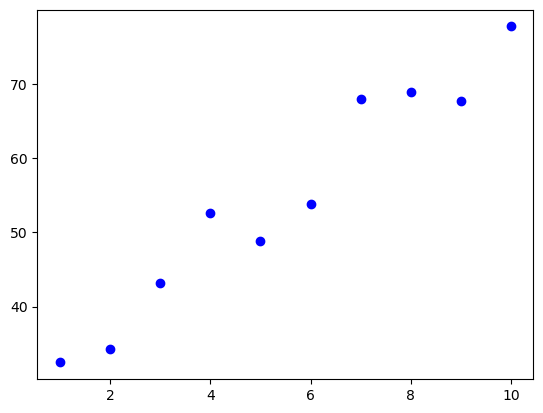

In [40]:
# Step-8: Plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data') # Scatter plot of actual data values

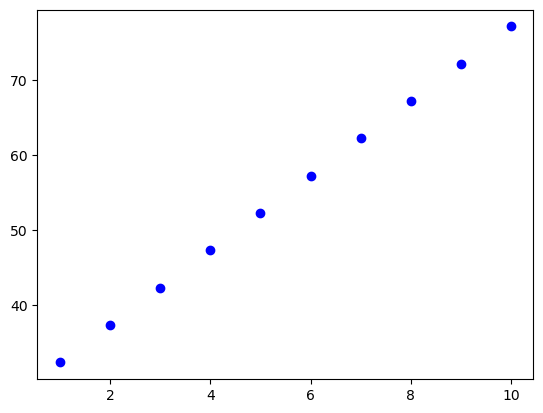

In [42]:
# Step-9: Plot the regression line (Best fit line)
plt.scatter(X,Y_pred,color='blue',label='Best Fit Line') # Regression line

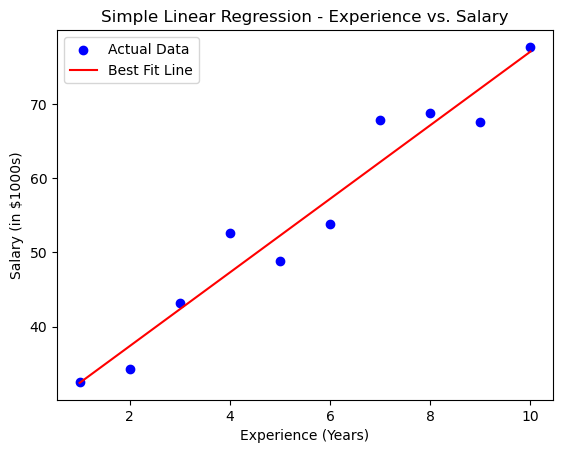

In [44]:
# Step 8: Plot the actual data points
plt.scatter (X, Y, color='blue', label='Actual Data') # Scatter plot of actual values 

# Step 9: Plot the Regression Line (Best Fit Line)
plt.plot(X, Y_pred, color='red', label='Best Fit Line') # Regression Line

# Step 10: Add Labels and Legend
plt.xlabel ('Experience (Years)') # Label for X-axis 
plt.ylabel('Salary (in $1000s)') # Label for Y-axis
plt.title('Simple Linear Regression - Experience vs. Salary') # Title of the plot 
plt.legend() # Show Legend

# Step 11: Display the graph
plt.show() # Show the final plotted graph

In [45]:
while True:
    try:
        exp=float(input("\nEnter years of experince to predict salary (or -1 to exit):"))
        if exp == -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number")


Enter years of experince to predict salary (or -1 to exit):7
Predicted Salary for 7.0 years of experience: $62.19K

Enter years of experince to predict salary (or -1 to exit):-1


In [48]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [50]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:42   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
